#### Pridicting Heart Disease by using Neural Networks.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data 
2. Create Training and Testing Datasets
3. Building and Training the Neural Network
4. Improving Results - A Binary Classification Problem
5. Results and Metrics


#### To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

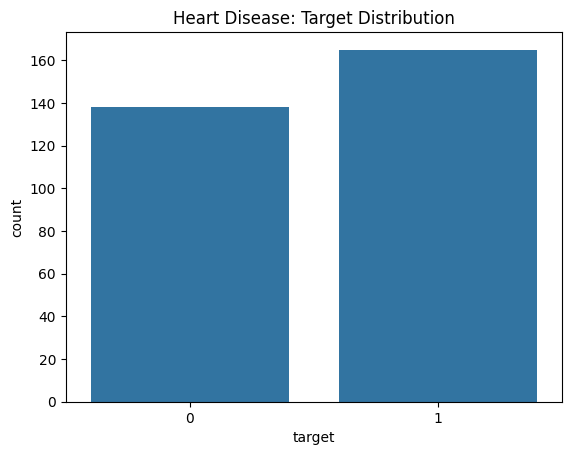

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


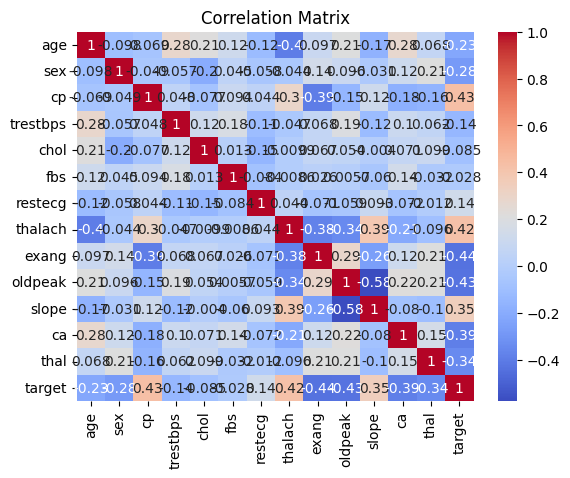

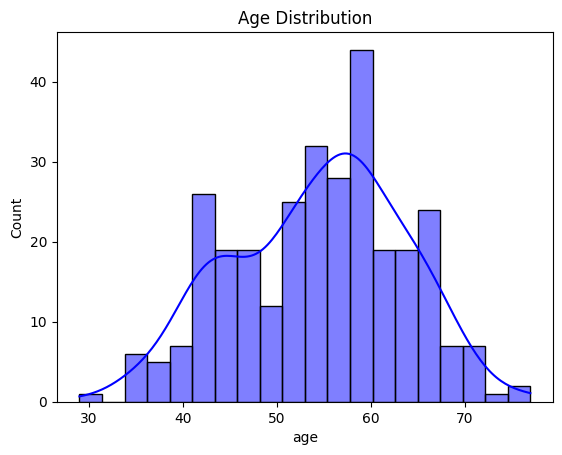

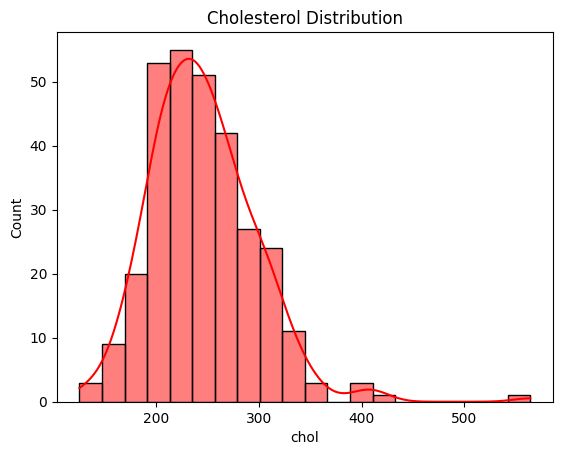

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./heart.csv')

# Descriptive statistics for numerical columns
print(data.describe())

# Visualize the distribution of the target variable
sns.countplot(x='target', data=data)
plt.title('Heart Disease: Target Distribution')
plt.show()

# Check for missing values
print(data.isnull().sum())

# Correlation matrix to explore relationships between numerical variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize distribution of important features (e.g., Age, Cholesterol)
sns.histplot(data['age'], kde=True, color='blue', bins=20)
plt.title('Age Distribution')
plt.show()

sns.histplot(data['chol'], kde=True, color='red', bins=20)
plt.title('Cholesterol Distribution')
plt.show()


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./heart.csv')

# Display the first few rows
print(data.head())

# Descriptive statistics for numerical features
print(data.describe())

# Checking for missing values
print(data.isnull().sum())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  12

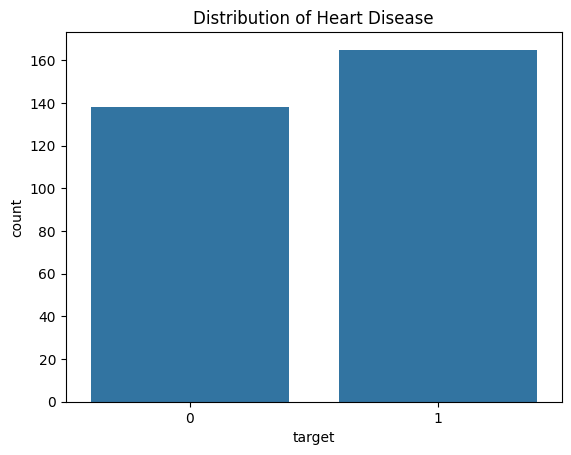

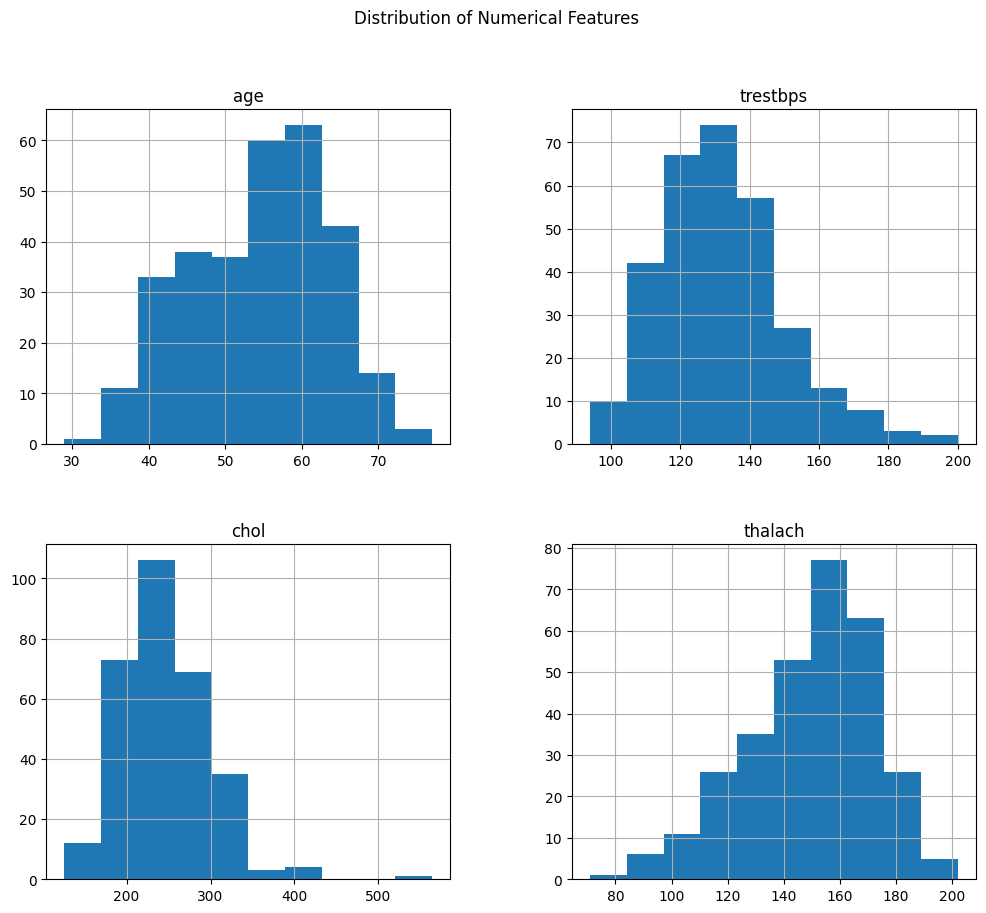

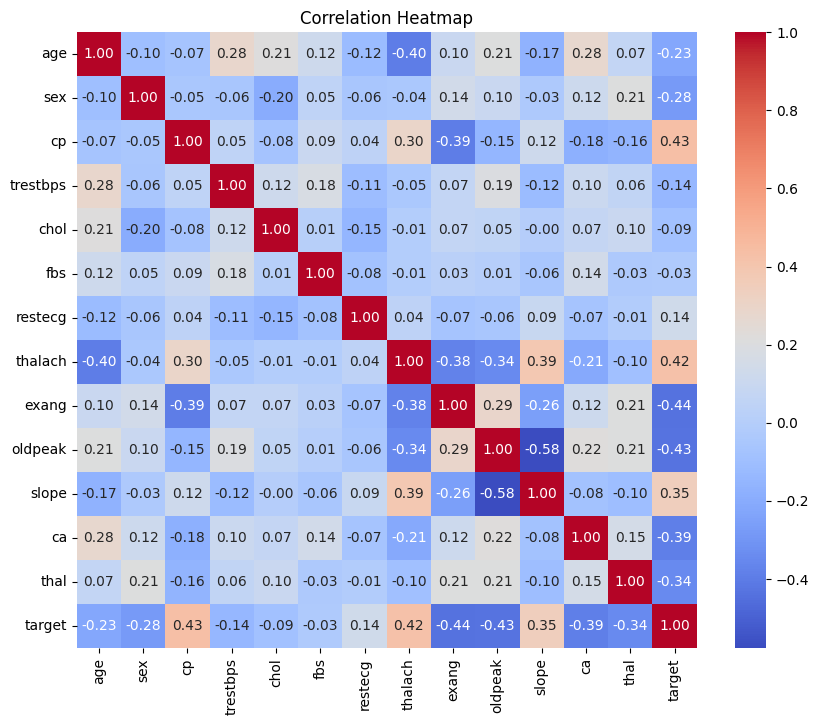

In [3]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease')
plt.show()

# Plot histograms for some numerical features
data[['age', 'trestbps', 'chol', 'thalach']].hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [4]:
# One-hot encode categorical columns (sex is already numeric, but cp, restecg, exang, etc. are categorical)
data = pd.get_dummies(data, drop_first=True)

# Check the new dataframe
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = data.drop(columns='target')
y = data['target']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test = scaler.transform(X_test)        # Only transform on testing data


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


ModuleNotFoundError: No module named 'tensorflow'

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


NameError: name 'model' is not defined

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test).round()  # Round predictions to 0 or 1

# Print classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict(X_test))
print('ROC AUC Score:', roc_auc)


NameError: name 'model' is not defined

NameError: name 'history' is not defined

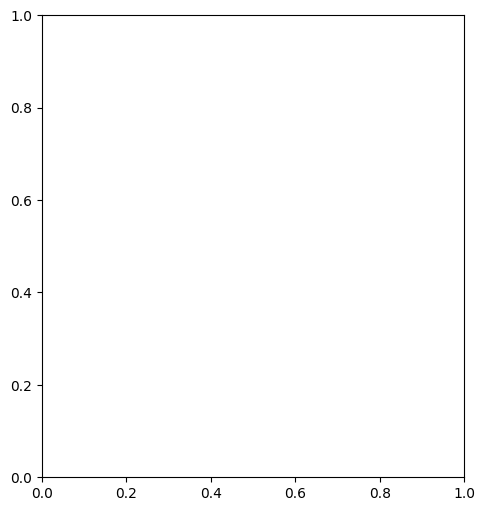

In [16]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Summary of the model
model.summary()

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [8]:
import sys
print(sys.executable)


C:\Users\ANU R\AppData\Local\Programs\Python\Python312\python.exe


In [9]:
!pip install tensorflow